### 1. Installing packages

In [1]:
# Setting the working directory
import os

print("Current working directory: {0}".format(os.getcwd()))

# Change the current working directory
os.chdir("/content/drive/MyDrive/Road_defects_detector")

HOME = os.getcwd()
print(HOME)


Current working directory: /content
/content/drive/MyDrive/Road_defects_detector


**Installing YOLOv8**

In [2]:
!pip install ultralytics
from IPython import display
display.clear_output()
!yolo checks


Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.4/78.2 GB disk)


In [3]:
!pip install roboflow
display.clear_output()

In [4]:
from ultralytics import YOLO
from IPython.display import display, Image
from roboflow import Roboflow

### 2. Installing the dataset from Roboflow

In [5]:
rf = Roboflow(api_key="RzE0LCsXT7QIZ2tyvkb1")
project = rf.workspace("defect-detection-nqy7t").project("defect-road-detector")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics<=8.0.20 is required but found version=8.0.115, to fix: `pip install ultralytics<=8.0.20`


Extracting Dataset Version Zip to Defect-road-detector-1 in yolov8:: 100%|██████████| 3396/3396 [00:18<00:00, 182.66it/s]


### 3. Training the model

In [6]:
model = YOLO('yolov8l.pt')
results = model.train(data="/content/drive/MyDrive/Road_defects_detector/Defect-road-detector-1/data.yaml", epochs=250, imgsz=240, batch=64)


100%|██████████| 83.7M/83.7M [00:01<00:00, 61.0MB/s]
Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/Road_defects_detector/Defect-road-detector-1/data.yaml, epochs=250, patience=50, batch=64, imgsz=240, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=

**Training results**

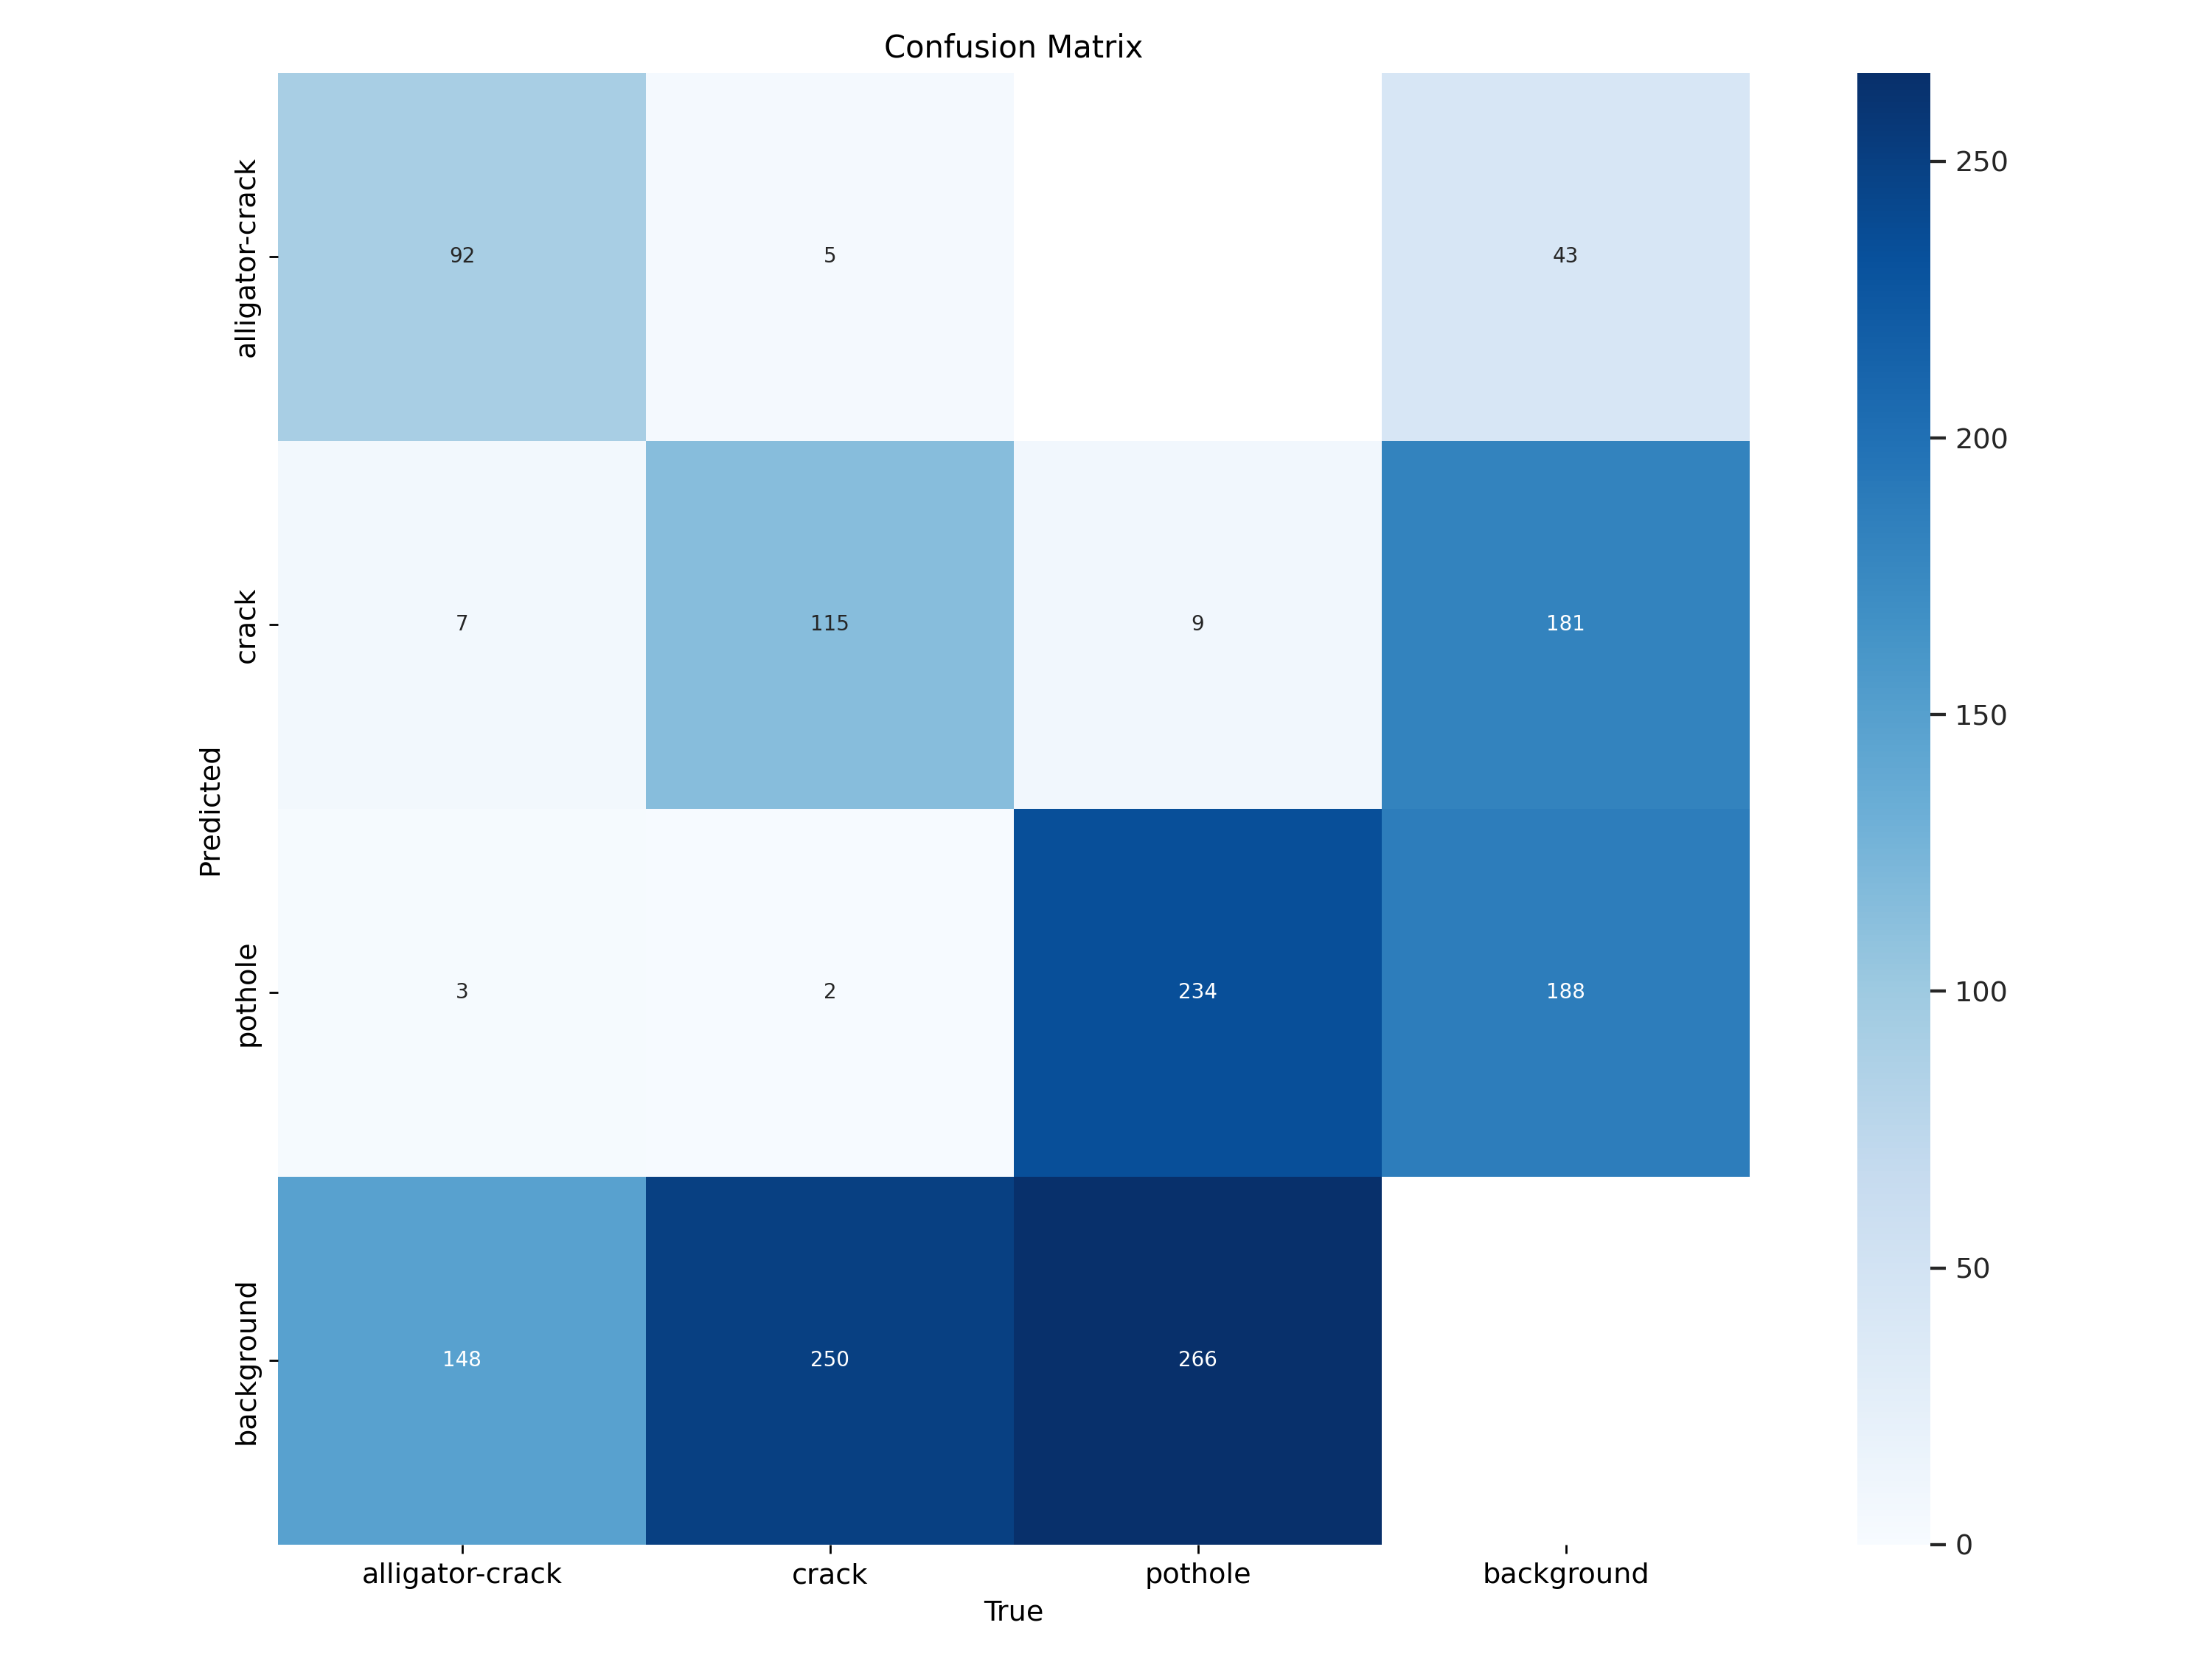

In [7]:
Image(filename='/content/drive/MyDrive/Road_defects_detector/runs/detect/train/confusion_matrix.png', width=600)

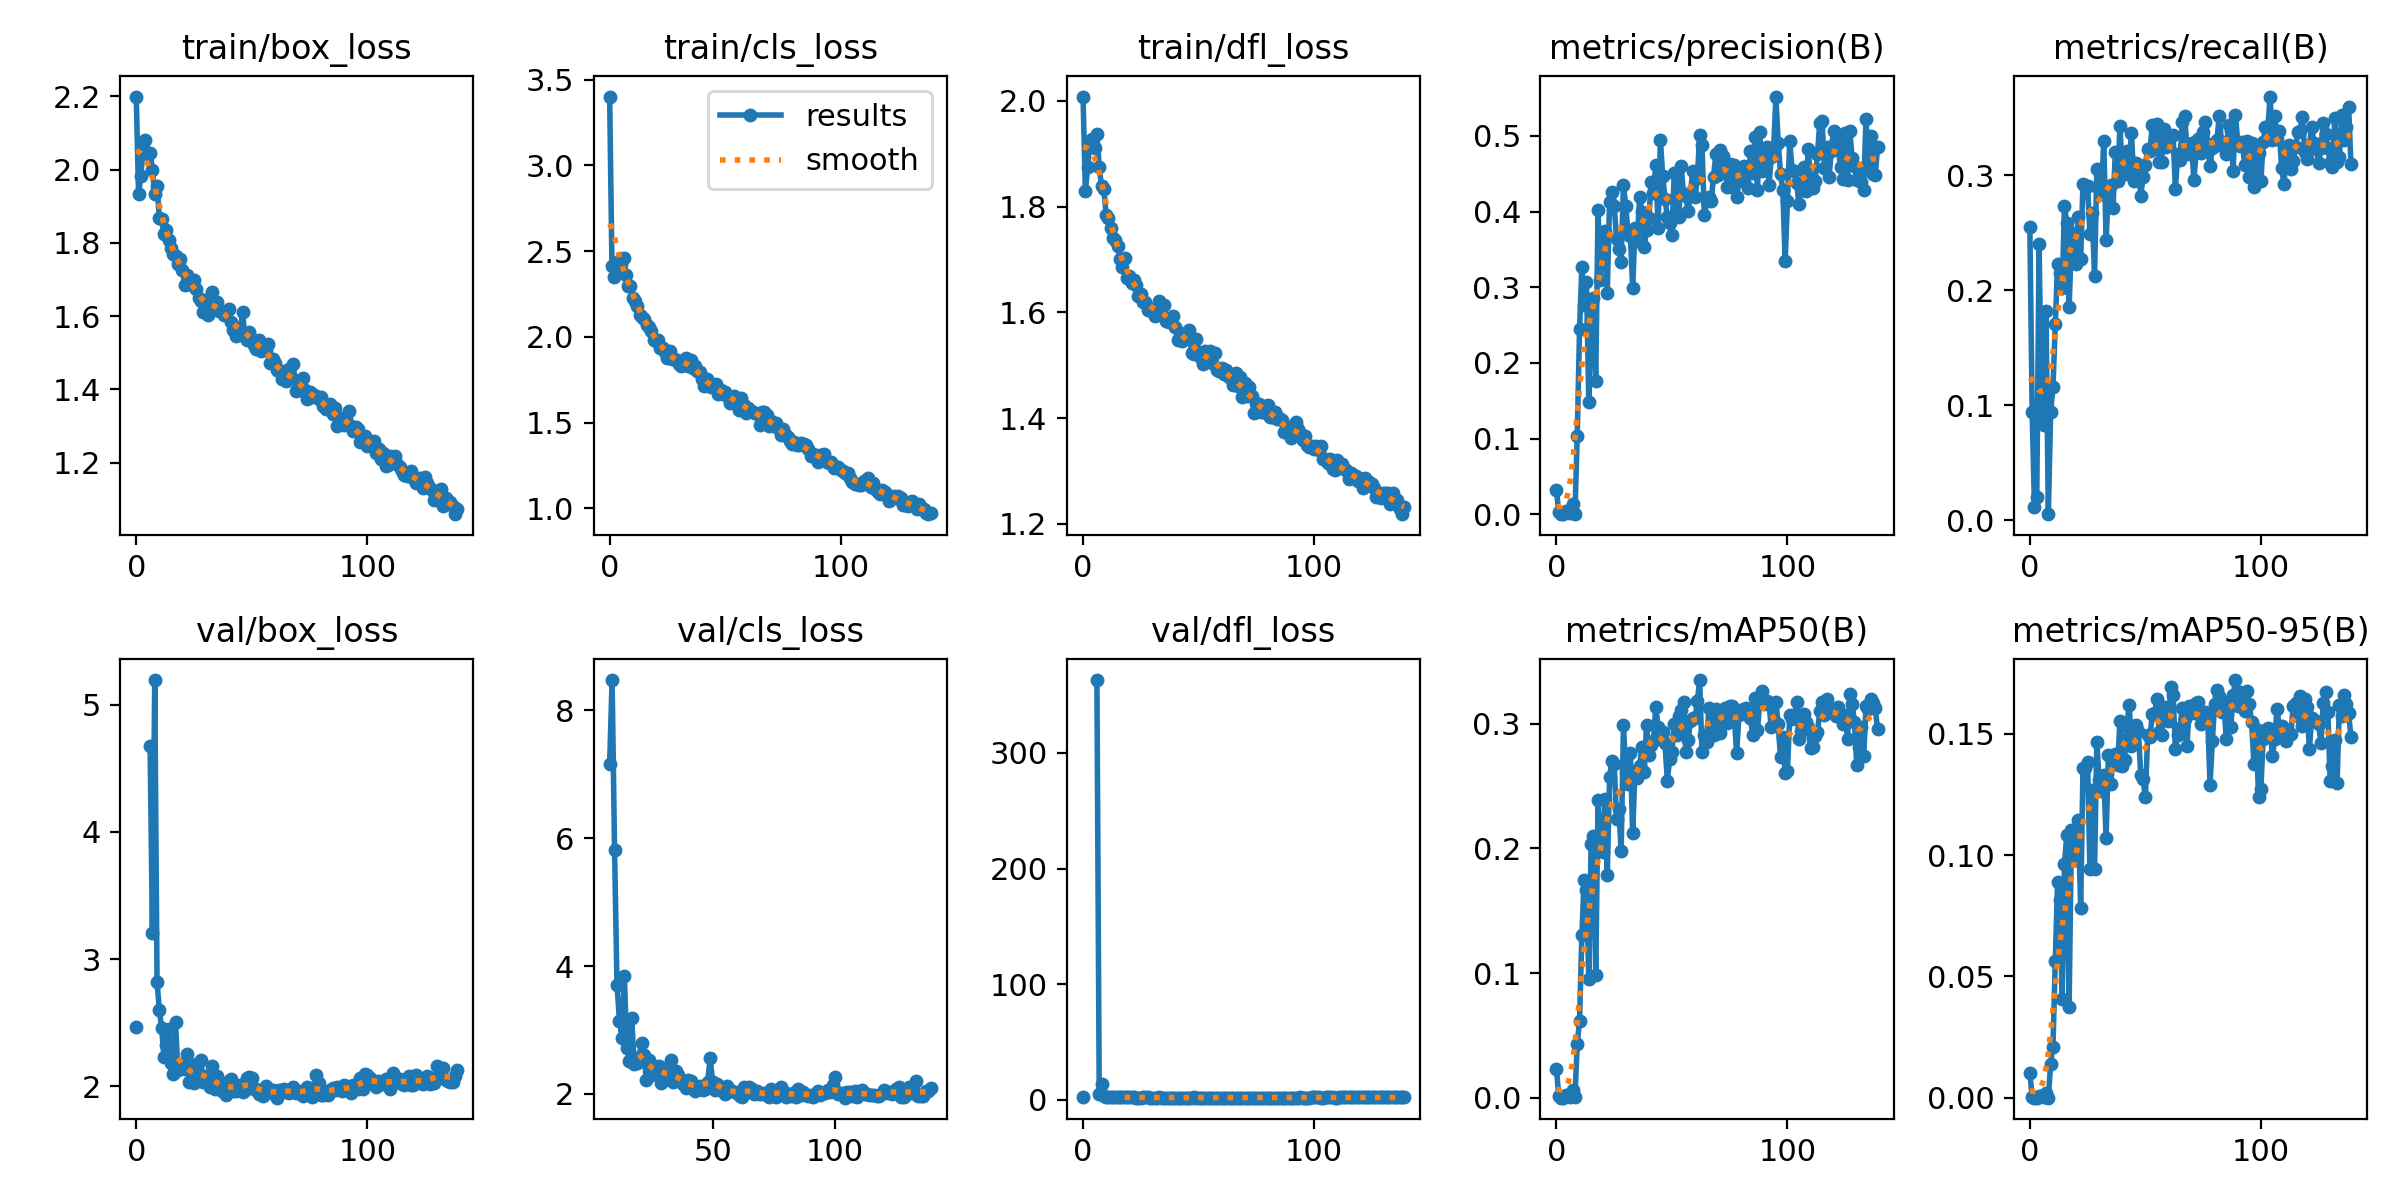

In [8]:
Image(filename='/content/drive/MyDrive/Road_defects_detector/runs/detect/train/results.png', width=600)

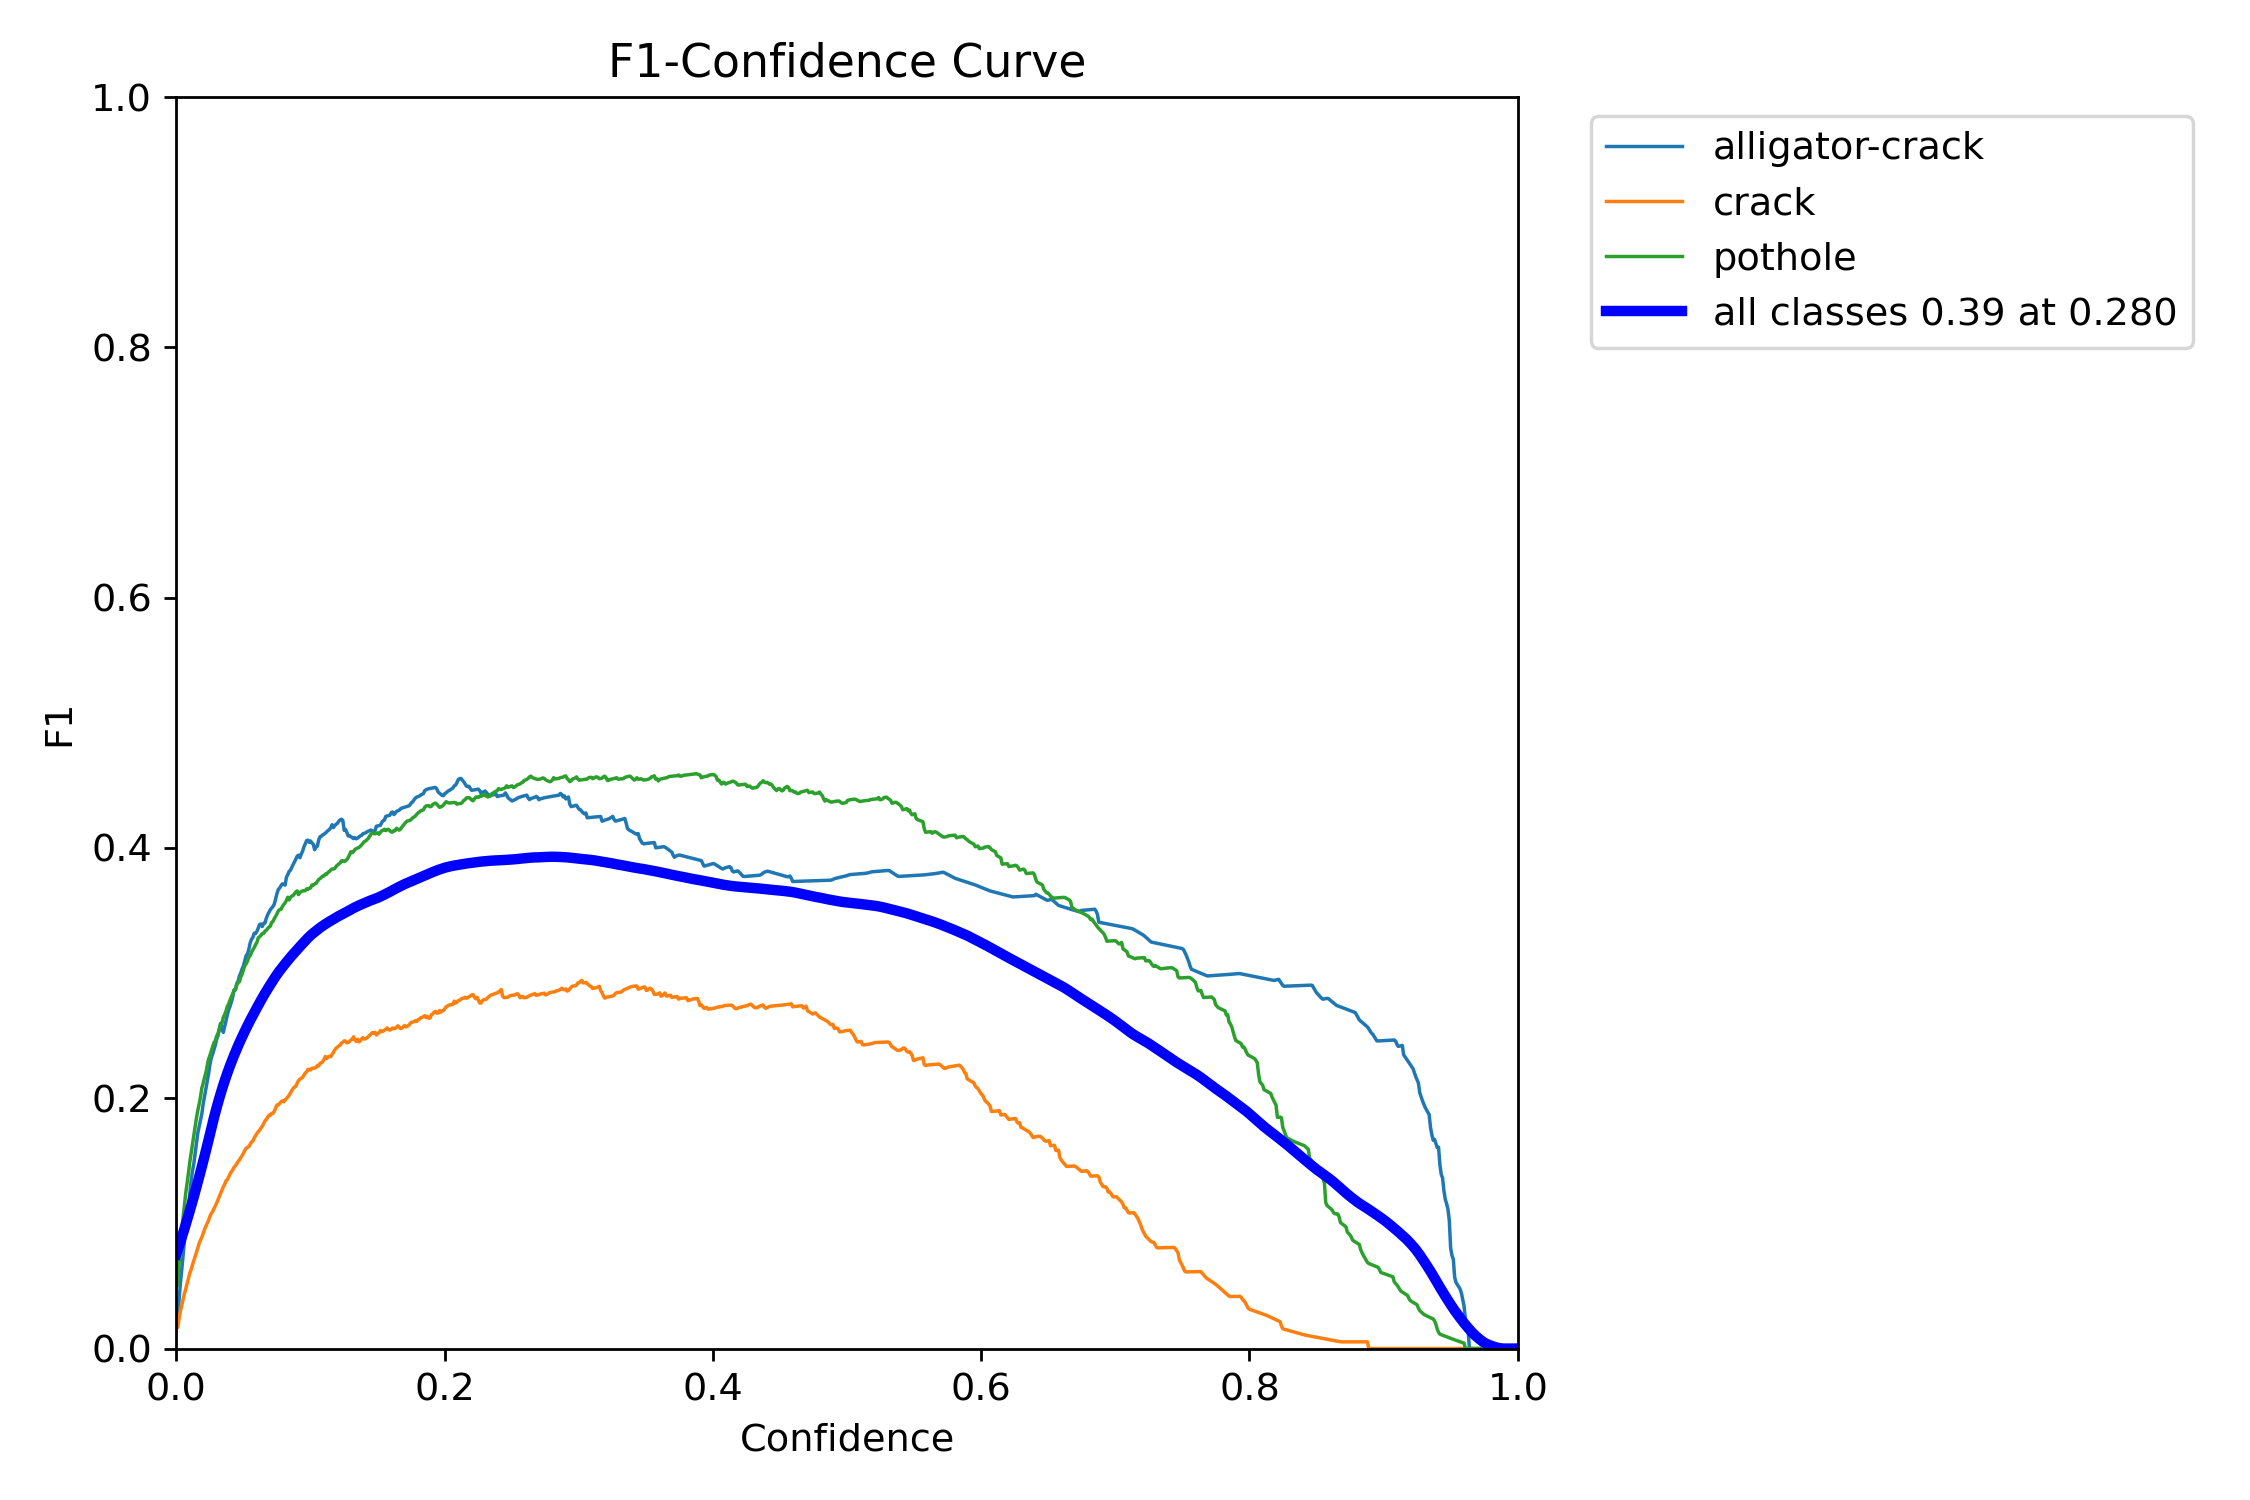

In [9]:
Image(filename='/content/drive/MyDrive/Road_defects_detector/runs/detect/train/F1_curve.png', width=600)

### 4. Validating the model

In [10]:
 model.val()

Ultralytics YOLOv8.0.115 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/Road_defects_detector/Defect-road-detector-1/valid/labels.cache... 376 images, 0 backgrounds, 0 corrupt: 100%|██████████| 376/376 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 67, len(boxes) = 1131. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:09<00:00,  1.62s/it]
                   all        376       1131      0.448      0.354      0.326      0.172
       alligator-crack        376        250      0.573       0.36      0.371      0.237
                 crack        376        372      0.287      0.274       0

ultralytics.yolo.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.yolo.utils.metrics.Metric object
confusion_matrix: <ultralytics.yolo.utils.metrics.ConfusionMatrix object at 0x7f0a53b2a290>
fitness: 0.18744395808760647
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.23663,    0.085432,     0.19419])
names: {0: 'alligator-crack', 1: 'crack', 2: 'pothole'}
plot: True
results_dict: {'metrics/precision(B)': 0.4477869684726323, 'metrics/recall(B)': 0.3541614381984494, 'metrics/mAP50(B)': 0.3256850750924986, 'metrics/mAP50-95(B)': 0.17208383397595178, 'fitness': 0.18744395808760647}
save_dir: PosixPath('runs/detect/val')
speed: {'preprocess': 0.963851492455665, 'inference': 7.058352866071336, 'loss': 0.0005085417564879072, 'postprocess': 5.131812805825091}

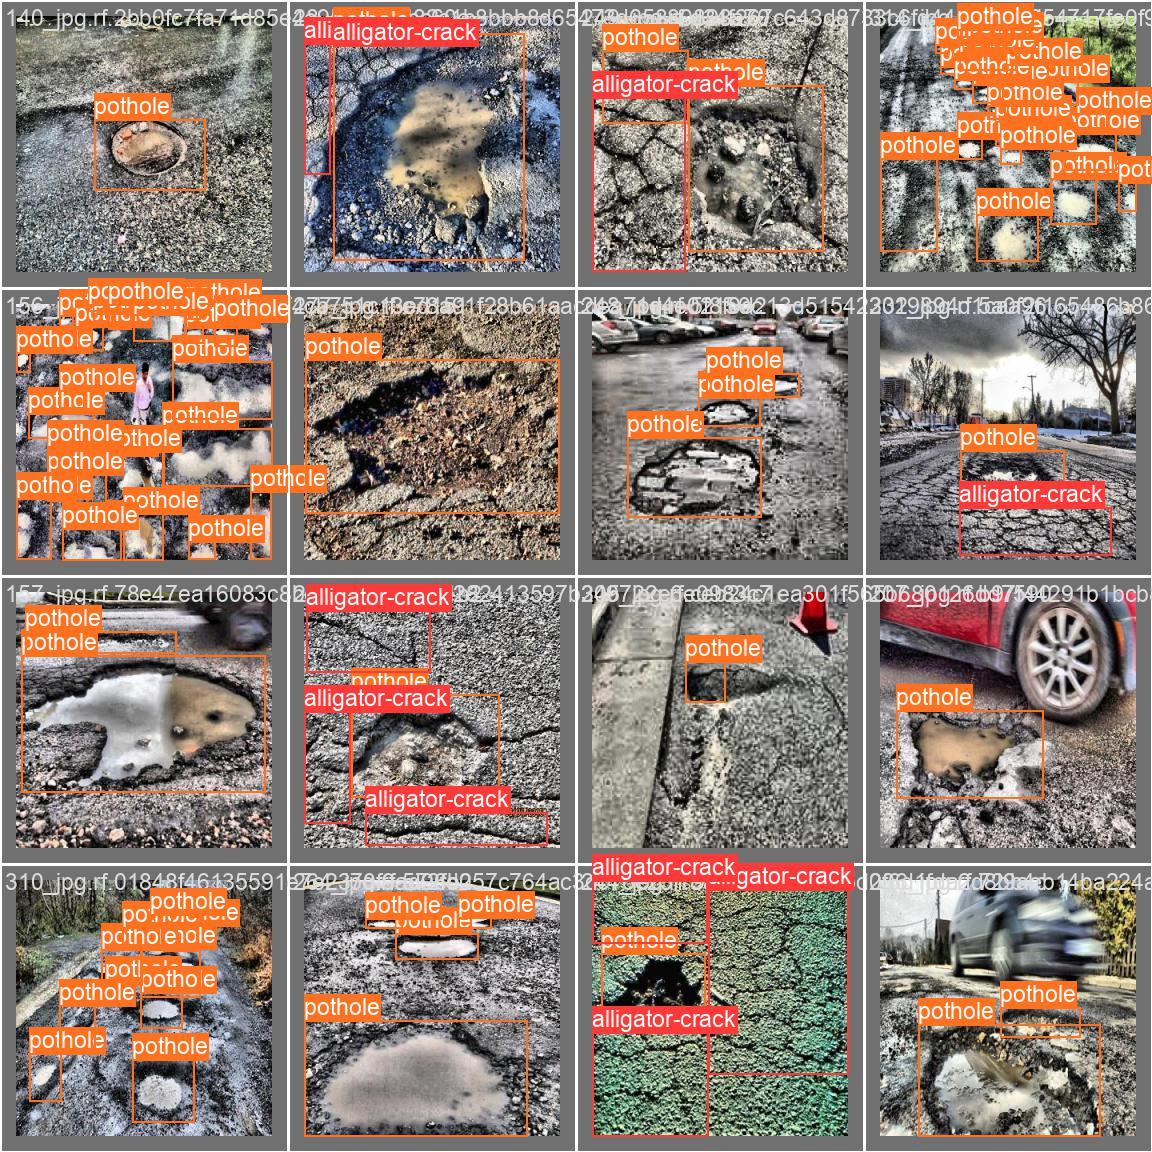

In [14]:
Image(filename='/content/drive/MyDrive/Road_defects_detector/runs/detect/train/val_batch2_labels.jpg', width=1000)

### 5. Testing the model

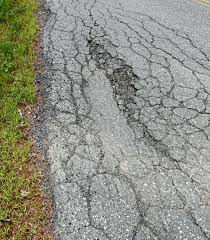

In [15]:
model2 = YOLO("/content/drive/MyDrive/Road_defects_detector/runs/detect/train/weights/best.pt")
im1 = Image("/content/drive/MyDrive/Road_defects_detector/test images/download.jpg")
im1

In [26]:
results = model.predict(source="/content/drive/MyDrive/Road_defects_detector/test images/download.jpg", save=True)


image 1/1 /content/drive/MyDrive/Road_defects_detector/test images/download.jpg: 256x224 1 alligator-crack, 20.5ms
Speed: 1.3ms preprocess, 20.5ms inference, 2.9ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict


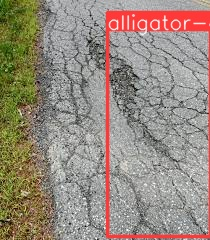

In [28]:
Image("/content/drive/MyDrive/Road_defects_detector/runs/detect/predict/download.jpg", width=128)

In [21]:
results = model.predict(source="/content/drive/MyDrive/Road_defects_detector/test images/image.png", save=True, imgsz=256)


image 1/1 /content/drive/MyDrive/Road_defects_detector/test images/image.png: 256x224 1 alligator-crack, 18.5ms
Speed: 1.2ms preprocess, 18.5ms inference, 2.3ms postprocess per image at shape (1, 3, 256, 256)
Results saved to runs/detect/predict


In [24]:
Image("/content/drive/MyDrive/Road_defects_detector/runs/detect/predict/image.png", width=256)

Output hidden; open in https://colab.research.google.com to view.